In [1]:
import yaml
import h5py
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
from skimage.segmentation import find_boundaries

## LEER DECON 05 CC

In [2]:
file_cc="/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190404_E1/20190404_E1_mGFP_CardiacRegion_0.5.nii.gz"
cc_20190404_E1 = nib.load(file_cc).get_fdata()
cc_20190404_E1.shape

(877, 829, 526, 1)

In [3]:
cc_20190404_E1 = cc_20190404_E1[:,:,:,0]
cc_20190404_E1.shape

(877, 829, 526)

### LEER PNAS

In [2]:
folder_pnas="/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/PNAS"
os.listdir(folder_pnas)

['20190404_E1_mGFP_CardiacRegion_0.5_XYZ_labels.nii.gz',
 '20190404_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz',
 '.DS_Store',
 '20190208_E2_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz',
 '20190401_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz',
 '20190119_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz',
 '20190401_E2_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz']

In [3]:
mem_20190404_E1_pnas = nib.load(os.path.join(folder_pnas, '20190404_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz')).get_fdata()
mem_20190404_E1_pnas.shape

(1, 480, 881, 900)

In [4]:
mem_20190404_E1_pnas = mem_20190404_E1_pnas[0,:,:,:]
mem_20190404_E1_pnas.shape

(480, 881, 900)

In [5]:
labels_pnas = (mem_20190404_E1_pnas > 0.5).astype('float32')
np.swapaxes(np.swapaxes(labels_pnas, 0, 2), 1, 0).shape

(881, 900, 480)

In [6]:
FILE = os.path.join(folder_pnas, '20190404_E1_mGFP_CardiacRegion_0.5_XYZ_labels.nii.gz')
ni_img = nib.Nifti1Image(np.swapaxes(np.swapaxes(labels_pnas, 0, 2), 1, 0).astype('uint16'), affine=np.eye(4))
nib.save(ni_img, FILE)

### LEER 3DUNET

In [10]:
folder_unet = "/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/UNet3D"
os.listdir(folder_unet)

['20190404_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz',
 '20190401_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz',
 '20190401_E2_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz']

In [47]:
mem_20190404_E1 = nib.load(os.path.join(folder_unet, '20190404_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz')).get_fdata()
mem_20190404_E1.shape

(1, 526, 877, 829)

In [48]:
mem_20190404_E1 = mem_20190404_E1[0,:,:,:]
mem_20190404_E1.shape

(526, 877, 829)

In [37]:
sum_mem = 0.3*mem_20190404_E1 + 0.7*mem_20190404_E1_pnas

In [38]:
np.mean(sum_mem)

0.06354218144894103

In [8]:
for t in range(48):
    plt.figure(figsize=(30,30)) 
    n = 10*t
    plots = [cc_20190404_E1[n, :, :], mem_20190404_E1_pnas[n, :, :]]
    titles = ["pnas", "3dunet", "suma"]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: 

In [40]:
labels_combined = (sum_mem > 0.5).astype('float32')

In [30]:
labels_mem_20190404_E1 = (mem_20190404_E1 > 0.5).astype('float32')
labels_mem_20190404_E1_pnas = (mem_20190404_E1_pnas > 0.5).astype('float32')

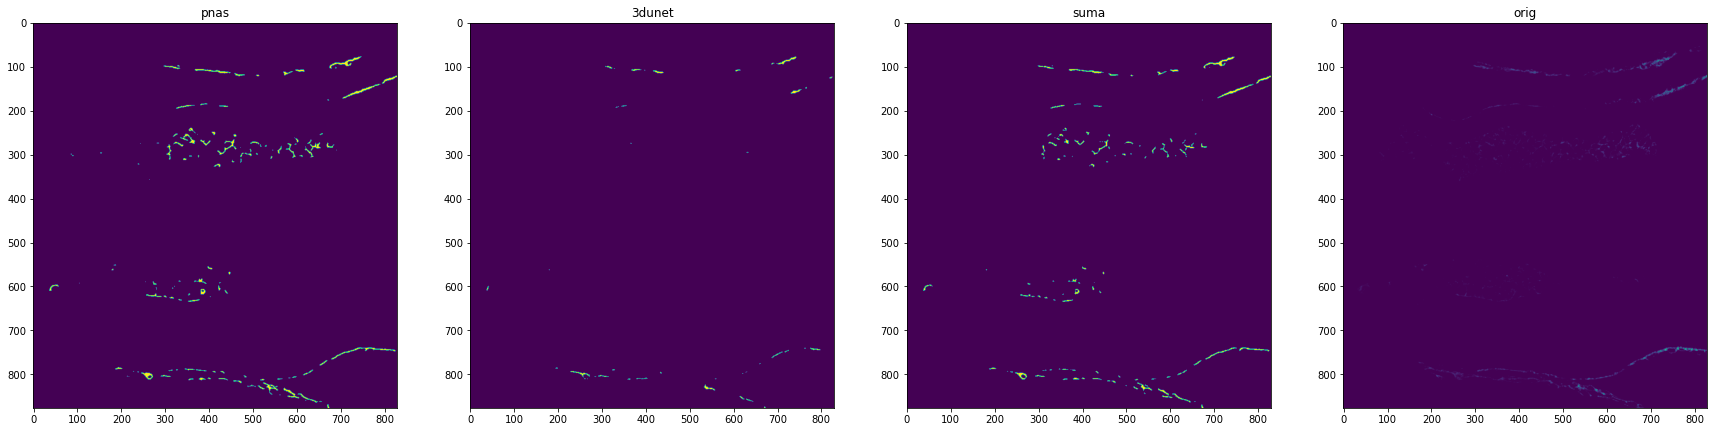

In [52]:
for t in range(48):
    plt.figure(figsize=(30,30)) 
    n = 10*t
    plots = [labels_mem_20190404_E1_pnas[:, n, :], 
             labels_mem_20190404_E1[:, n, :],  
             labels_combined[:, n, :], 
             cc_20190404_E1[:,:,n]]
    titles = ["pnas", "3dunet", "suma", "orig"]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [50]:
mem_20190404_E1_pnas.shape

(526, 877, 829)